In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import skew
from scipy.special import boxcox1p
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
import shap  # Ensure SHAP is installed: pip install shap
import lime
from lime import lime_tabular

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data/Car_Insurance_Claim.csv')
data.head()

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        sedan                    0   
1       0.0        10238         16000.0        sedan                    0   
2       0.0        10238         11000.0        sedan                    0   
3       1.0        32765         11000.0        sedan                    0   
4       0.0        32765         12000.0        sedan                    2   

   DUIS  PAST_ACCIDENTS  OUTCOME  
0     0               0      0.0  
1     0               0      1.0  
2     0               0      0.0  
3     0               0      0.0  
4     0               1      1.0

In [5]:
print(data.shape)

(10000, 19)


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [7]:
print(data.describe())

                  ID  CREDIT_SCORE  VEHICLE_OWNERSHIP       MARRIED  \
count   10000.000000   9018.000000       10000.000000  10000.000000   
mean   500521.906800      0.515813           0.697000      0.498200   
std    290030.768758      0.137688           0.459578      0.500022   
min       101.000000      0.053358           0.000000      0.000000   
25%    249638.500000      0.417191           0.000000      0.000000   
50%    501777.000000      0.525033           1.000000      0.000000   
75%    753974.500000      0.618312           1.000000      1.000000   
max    999976.000000      0.960819           1.000000      1.000000   

           CHILDREN   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count  10000.000000  10000.000000     9043.000000         10000.000000   
mean       0.688800  19864.548400    11697.003207             1.482900   
std        0.463008  18915.613855     2818.434528             2.241966   
min        0.000000  10238.000000     2000.000000             0.

In [8]:
print(data.isnull().sum())

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [9]:
print(data.isnull().sum()*100/len(data))

ID                     0.00
AGE                    0.00
GENDER                 0.00
RACE                   0.00
DRIVING_EXPERIENCE     0.00
EDUCATION              0.00
INCOME                 0.00
CREDIT_SCORE           9.82
VEHICLE_OWNERSHIP      0.00
VEHICLE_YEAR           0.00
MARRIED                0.00
CHILDREN               0.00
POSTAL_CODE            0.00
ANNUAL_MILEAGE         9.57
VEHICLE_TYPE           0.00
SPEEDING_VIOLATIONS    0.00
DUIS                   0.00
PAST_ACCIDENTS         0.00
OUTCOME                0.00
dtype: float64


In [10]:
for col in data.columns:
    print(col, data[col].nunique())

ID 10000
AGE 4
GENDER 2
RACE 2
DRIVING_EXPERIENCE 4
EDUCATION 3
INCOME 4
CREDIT_SCORE 9018
VEHICLE_OWNERSHIP 2
VEHICLE_YEAR 2
MARRIED 2
CHILDREN 2
POSTAL_CODE 4
ANNUAL_MILEAGE 21
VEHICLE_TYPE 2
SPEEDING_VIOLATIONS 21
DUIS 7
PAST_ACCIDENTS 15
OUTCOME 2


In [11]:
# Drop unnecessary columns
data.drop(columns=['ID'], inplace=True)

In [12]:
data.head()

AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0    65+  female  majority               0-9y  high school    upper class   
1  16-25    male  majority               0-9y         none        poverty   
2  16-25  female  majority               0-9y  high school  working class   
3  16-25    male  majority               0-9y   university  working class   
4  26-39    male  majority             10-19y         none  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.629027                1.0   after 2015      0.0       1.0   
1      0.357757                0.0  before 2015      0.0       0.0   
2      0.493146                1.0  before 2015      0.0       0.0   
3      0.206013                1.0  before 2015      0.0       1.0   
4      0.388366                1.0  before 2015      0.0       0.0   

   POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  \
0        10238         12000.0        sedan                    0     0   
1        10238         16000.0        sedan                    0     0   
2        10238         11000.0        sedan                    0     0   
3        32765         11000.0        sedan                    0     0   
4        32765         12000.0        sedan                    2     0   

   PAST_ACCIDENTS  OUTCOME  
0               0      0.0  
1               0      1.0  
2               0      0.0  
3               0      0.0  
4               1      1.0

In [13]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.fit_transform(data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

In [14]:
data.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

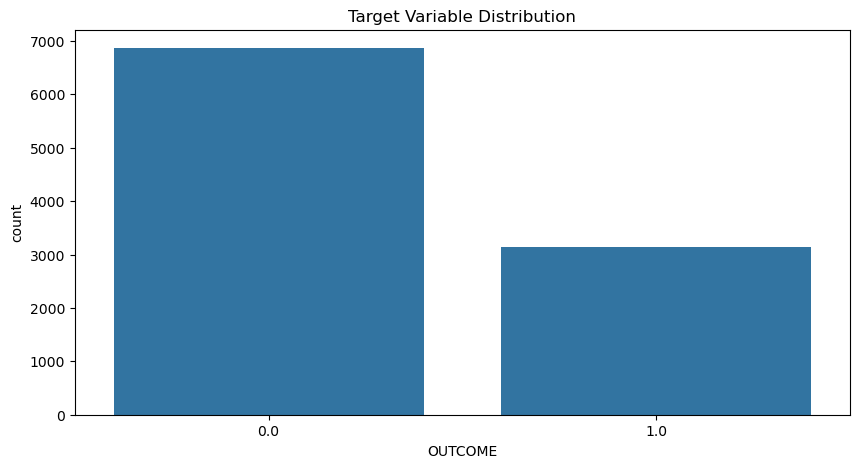

In [15]:
# Data Visualization
plt.figure(figsize=(10,5))
sns.countplot(x='OUTCOME', data=data)
plt.title("Target Variable Distribution")
plt.show()

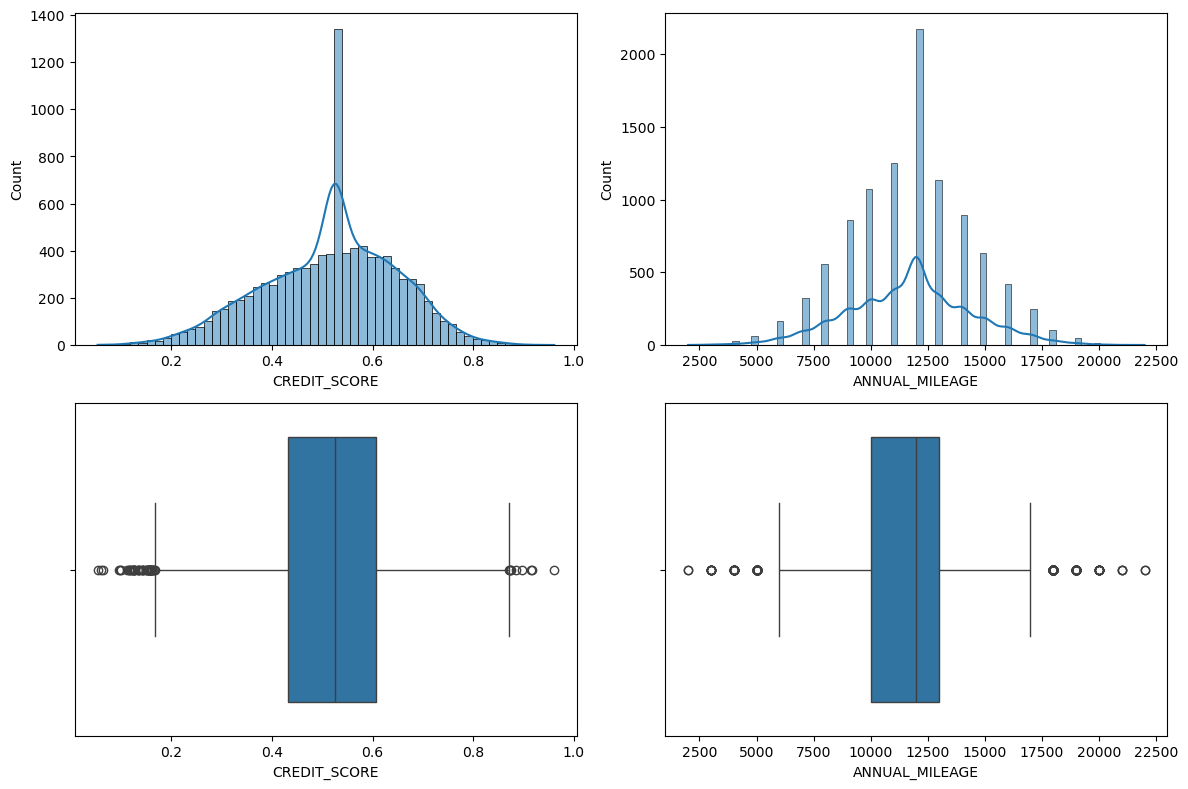

In [16]:
# Univariate analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data['CREDIT_SCORE'], kde=True, ax=axes[0, 0])
sns.histplot(data['ANNUAL_MILEAGE'], kde=True, ax=axes[0, 1])
sns.boxplot(x=data['CREDIT_SCORE'], ax=axes[1, 0])
sns.boxplot(x=data['ANNUAL_MILEAGE'], ax=axes[1, 1])
plt.tight_layout()
plt.show()


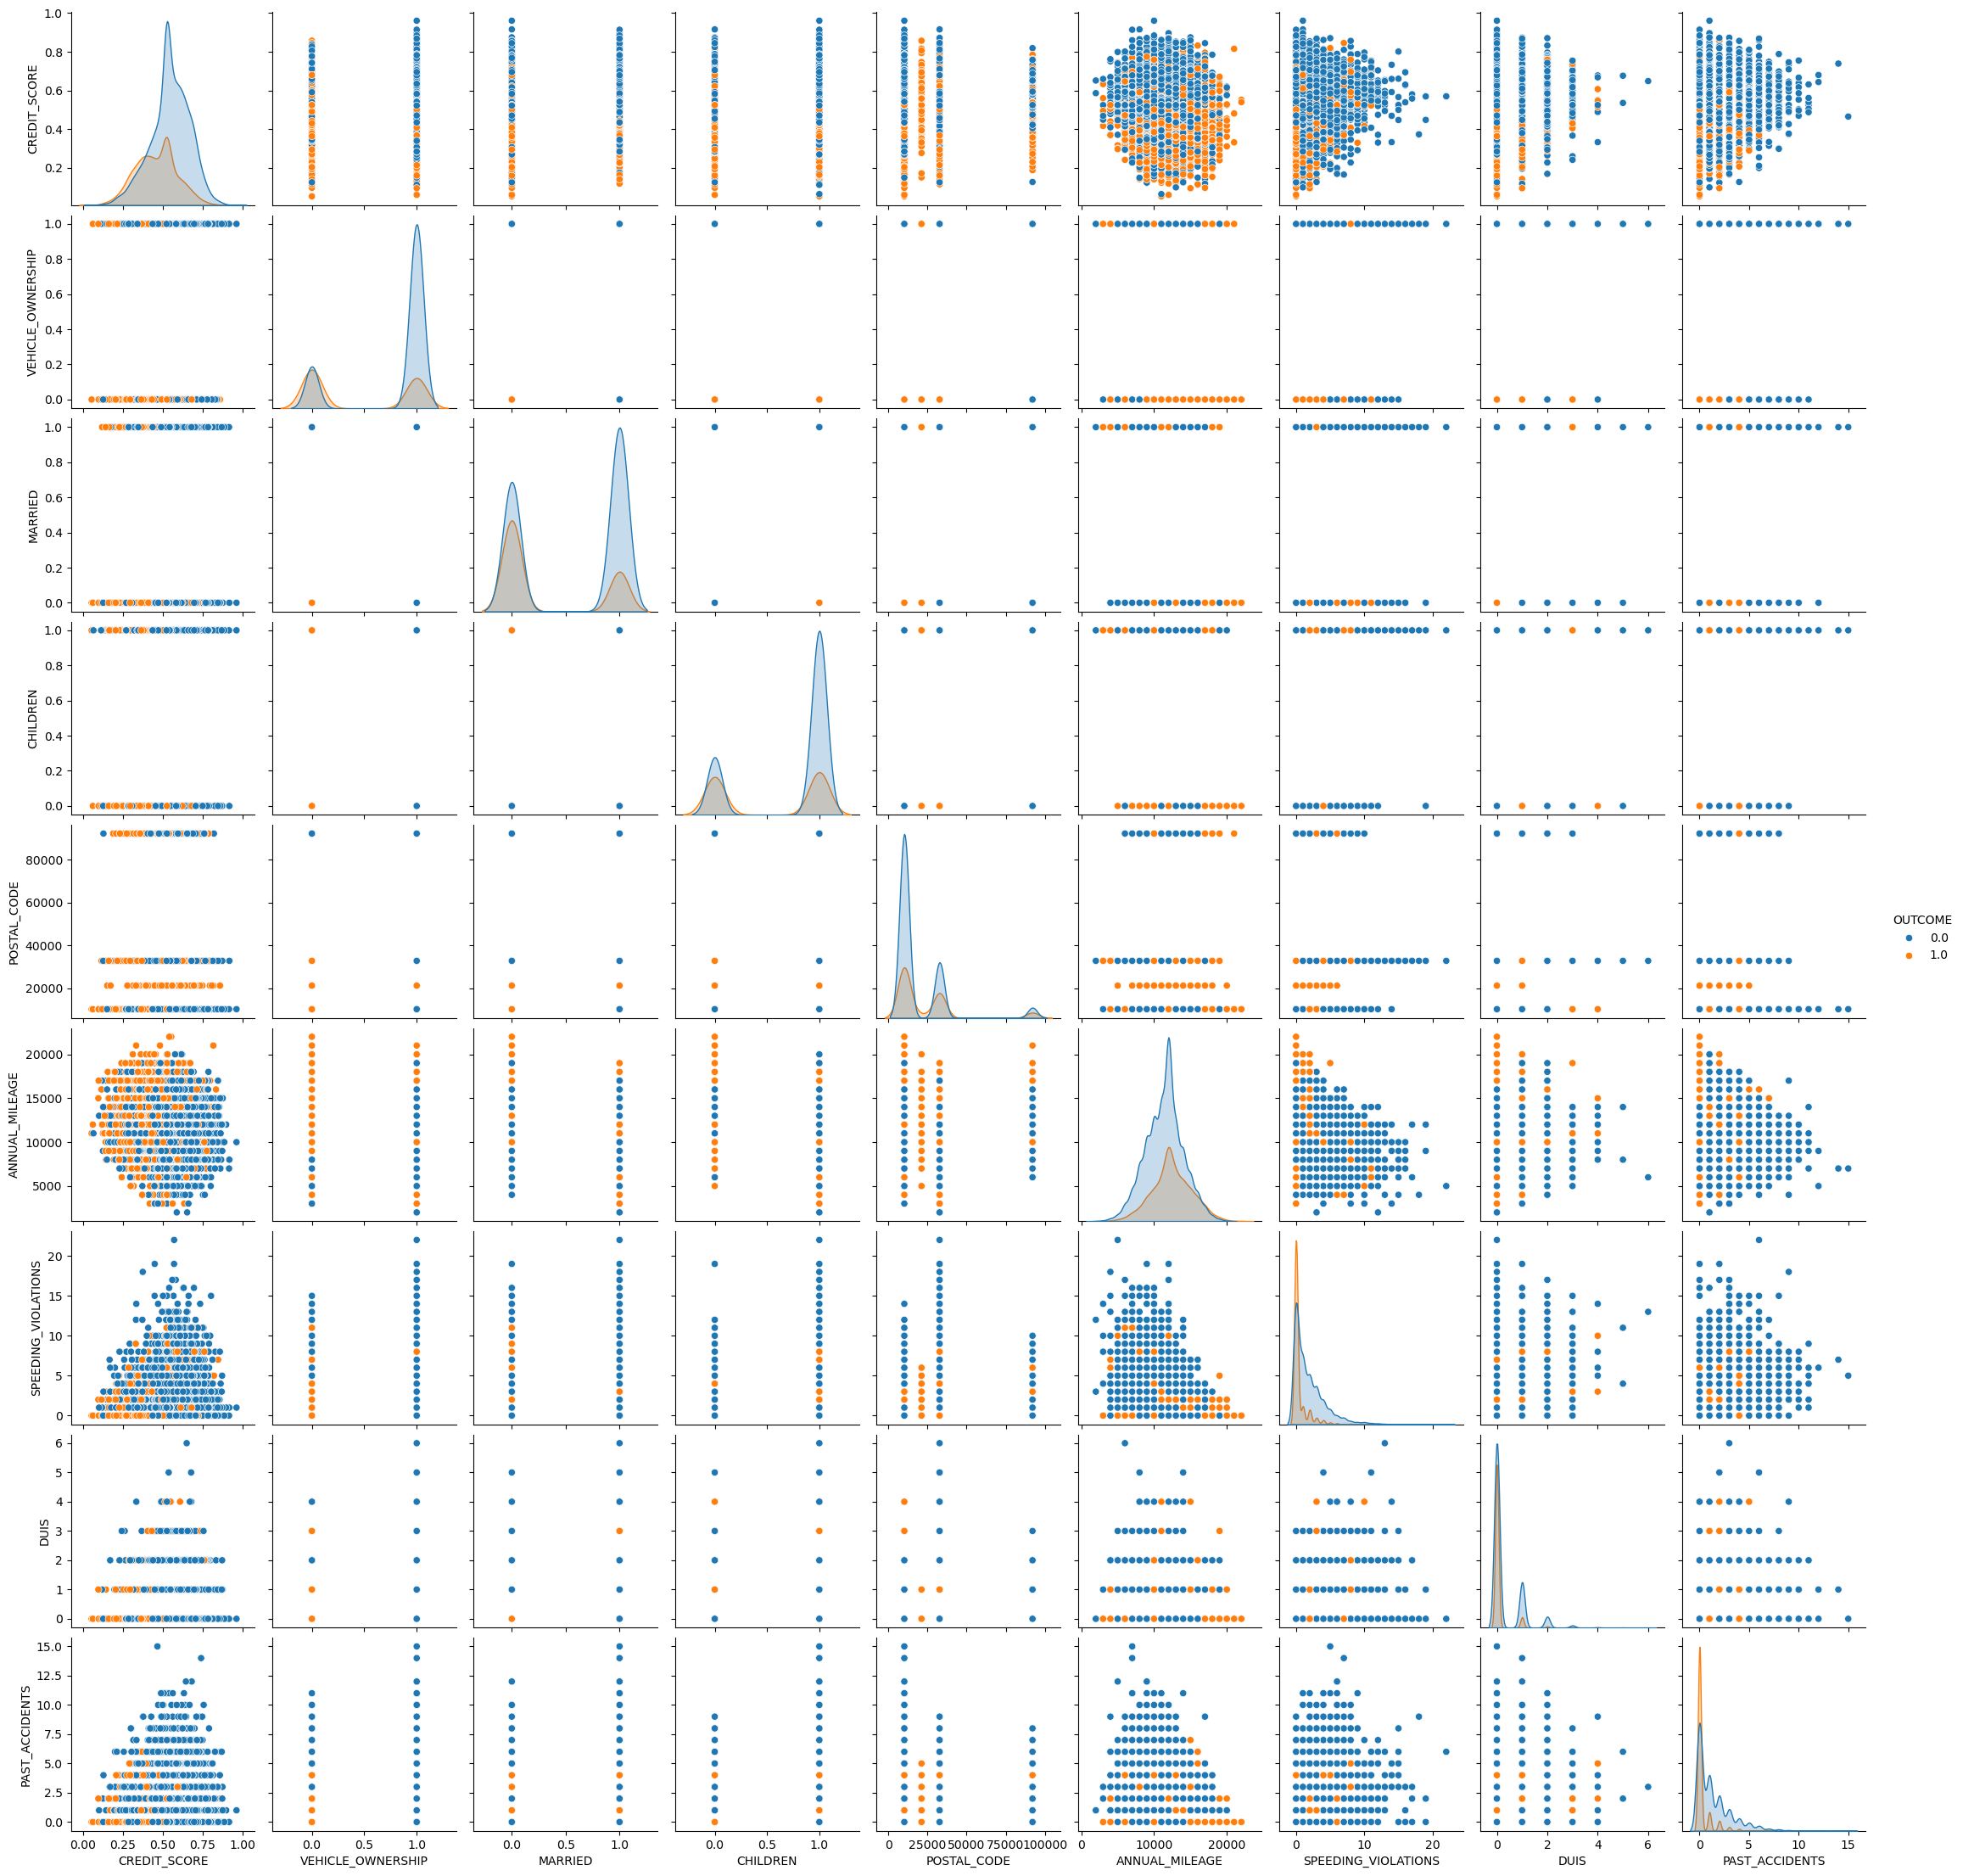

In [17]:
# Bivariate analysis
sns.pairplot(data, hue='OUTCOME')
plt.show()

In [18]:
# Checking skewness
skewness = data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']].skew()
print("Skewness of Features:\n", skewness)

Skewness of Features:
 CREDIT_SCORE     -0.258131
ANNUAL_MILEAGE    0.009886
dtype: float64


In [19]:
# Handling skewness
data['CREDIT_SCORE'] = np.log1p(data['CREDIT_SCORE'])
data['ANNUAL_MILEAGE'] = np.log1p(data['ANNUAL_MILEAGE'])

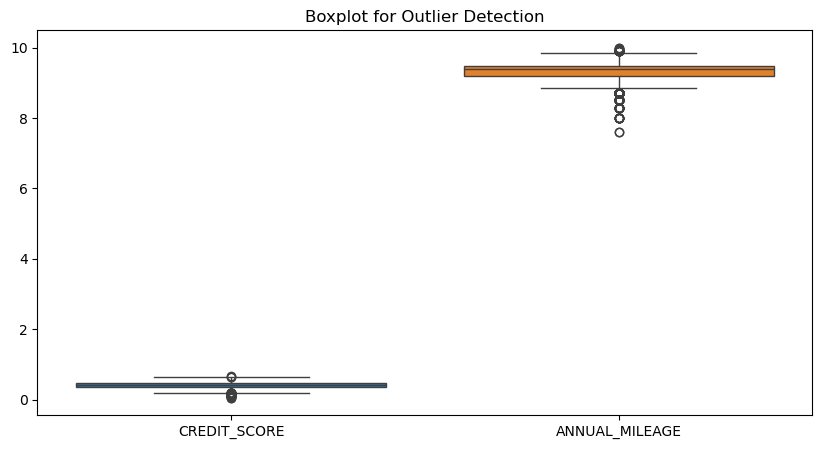

In [20]:
# Checking for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [21]:
# Handling outliers
from scipy import stats
z_scores = np.abs(stats.zscore(data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']]))
data = data[(z_scores < 3).all(axis=1)]

In [22]:
# Encoding categorical variables
data['POSTAL_CODE'] = data['POSTAL_CODE'].astype(str)
data = pd.get_dummies(data, columns=['POSTAL_CODE'], drop_first=True)
categorical_cols = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


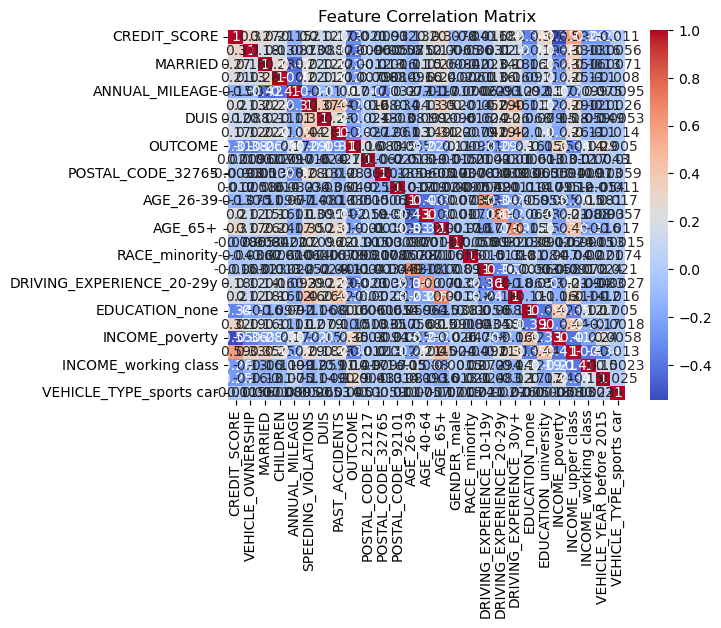

In [23]:
# Checking for multicollinearity
import statsmodels.api as sm
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [24]:
# Separating target variable
y = data['OUTCOME']
X = data.drop(columns=['OUTCOME'])

In [25]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [27]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [29]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

In [30]:
# Hyperparameter tuning using GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [5, 10, 20]},
    'AdaBoost': {'n_estimators': [50, 100]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

In [31]:
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=cv, scoring=make_scorer(f1_score))
        grid_search.fit(X_train_pca, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_train_pca, y_train)
        best_models[name] = model

In [32]:
# Model evaluation
for name, model in best_models.items():
    y_pred = model.predict(X_test_pca)
    print(f"{name} Model:\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Logistic Regression Model:

Accuracy: 0.8530280649926145
Precision: 0.8453757225433526
Recall: 0.8641063515509602
F1 Score: 0.8546384222059897
ROC AUC Score: 0.8530280649926145
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1354
         1.0       0.85      0.86      0.85      1354

    accuracy                           0.85      2708
   macro avg       0.85      0.85      0.85      2708
weighted avg       0.85      0.85      0.85      2708

[[1140  214]
 [ 184 1170]]
--------------------------------------------------
Random Forest Model:

Accuracy: 0.8814623338257016
Precision: 0.8707824838478104
Recall: 0.895864106351551
F1 Score: 0.8831452493629414
ROC AUC Score: 0.8814623338257017
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1354
         1.0       0.87      0.90      0.88      1354

    accuracy                           0.88      2708
   macro avg       0.88      0

100%|===================| 5411/5416 [02:00<00:00]        

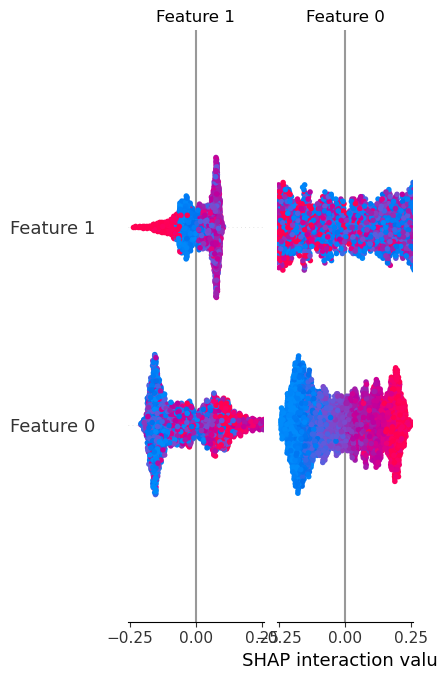

In [42]:
# Explainability with SHAP
explainer = shap.Explainer(best_models['Random Forest'], X_train_pca)
shap_values = explainer(X_test_pca)
shap.summary_plot(shap_values, X_test_pca)

In [43]:
# Explainability with LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_pca, feature_names=X.columns, class_names=['No Claim', 'Claim'], mode='classification')
exp = explainer_lime.explain_instance(X_test_pca[0], best_models['Random Forest'].predict_proba)
exp.show_in_notebook()

# ANN

In [33]:
# ANN Model
tf.keras.backend.clear_session()
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [34]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_data=(X_test_pca, y_test))


Epoch 1/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.7542 - loss: 0.5082 - val_accuracy: 0.8527 - val_loss: 0.3385
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8362 - loss: 0.3721 - val_accuracy: 0.8549 - val_loss: 0.3291
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8478 - loss: 0.3496 - val_accuracy: 0.8597 - val_loss: 0.3251
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8572 - loss: 0.3408 - val_accuracy: 0.8600 - val_loss: 0.3227
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8457 - loss: 0.3578 - val_accuracy: 0.8634 - val_loss: 0.3172
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8453 - loss: 0.3513 - val_accuracy: 0.8578 - val_loss: 0.3172
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8525 - loss: 0.3410 - val_accuracy: 0.8593 - val_loss: 0.3144
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8487 - loss: 0.3437 - 

PermutationExplainer explainer: 2709it [01:14, 32.07it/s]                          


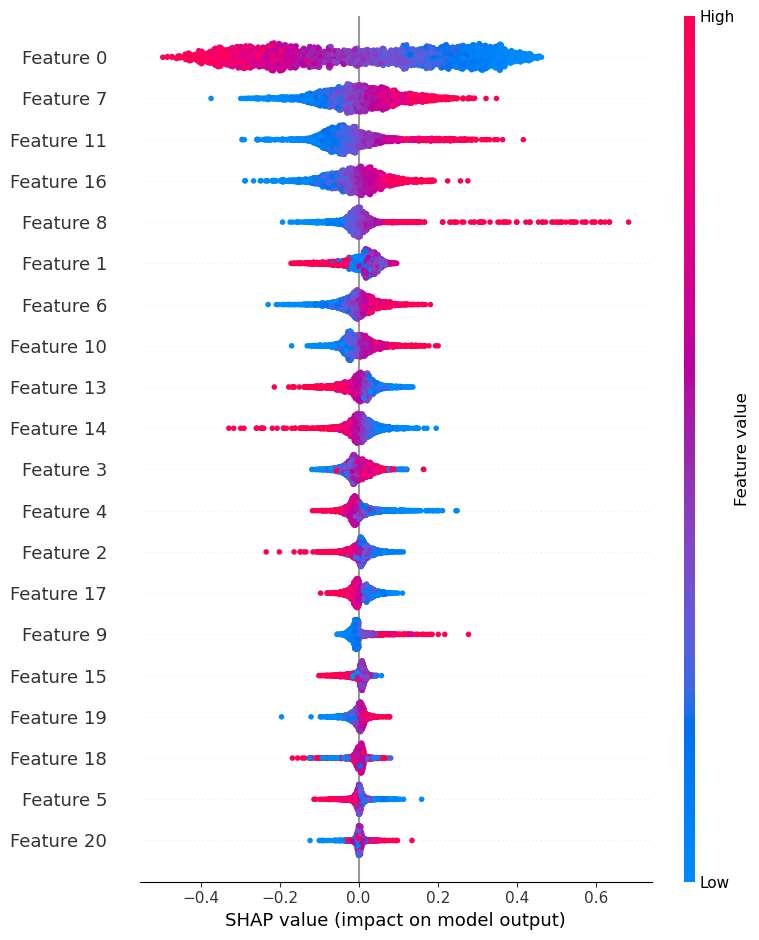

In [44]:
# Explainability with SHAP
explainer = shap.Explainer(ann_model, X_train_pca)
shap_values = explainer(X_test_pca)
shap.summary_plot(shap_values, X_test_pca)

The Random Forest SHAP plot typically shows more distinct, stepwise impacts—reflecting the discrete splits of tree-based models—while the ANN SHAP plot displays smoother, more continuous effects that mirror the neural network's gradual decision boundaries. Although some important features overlap between the two, the ranking and degree of influence can vary, indicating that each model captures feature relationships in its own unique way.

In [47]:
# Explainability with LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_pca, feature_names=X.columns, class_names=['No Claim', 'Claim'], mode='classification')
exp = explainer_lime.explain_instance(X_test_pca[0], lambda x: np.hstack([(1 - ann_model.predict(x)), ann_model.predict(x)]))
exp.show_in_notebook()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


The LIME explanations for the Random Forest show a few dominant features with clear, discrete contributions reflecting its threshold-based splits. In contrast, the ANN's LIME results tend to distribute importance more evenly across several features, highlighting smoother, continuous decision boundaries. Both models agree on key drivers but differ in the magnitude and ranking of feature impacts.

# Creating a function to build the ANN model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_ann_model(neurons=[64, 32], dropout_rates=[0.3, 0.2], input_shape=None):
    """
    Build and compile an ANN model with given neurons and dropout rates.
    
    Parameters:
      neurons (list): List specifying the number of neurons in each hidden layer.
      dropout_rates (list): List specifying dropout rate after each hidden layer.
      input_shape (int): The number of features in the input data.
    
    Returns:
      model: A compiled Keras Sequential model.
    """
    model = Sequential()
    # Add first hidden layer with input shape
    model.add(Dense(neurons[0], activation='relu', input_shape=(input_shape,)))
    if dropout_rates[0] > 0:
        model.add(Dropout(dropout_rates[0]))
    # Add additional hidden layers
    for n, d in zip(neurons[1:], dropout_rates[1:]):
        model.add(Dense(n, activation='relu'))
        if d > 0:
            model.add(Dropout(d))
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Experiment 1 - Varying the number of neurons in the first layer

Training model with first layer neurons = 32
Test accuracy with 32 neurons: 0.8630

Training model with first layer neurons = 64
Test accuracy with 64 neurons: 0.8652

Training model with first layer neurons = 128
Test accuracy with 128 neurons: 0.8719



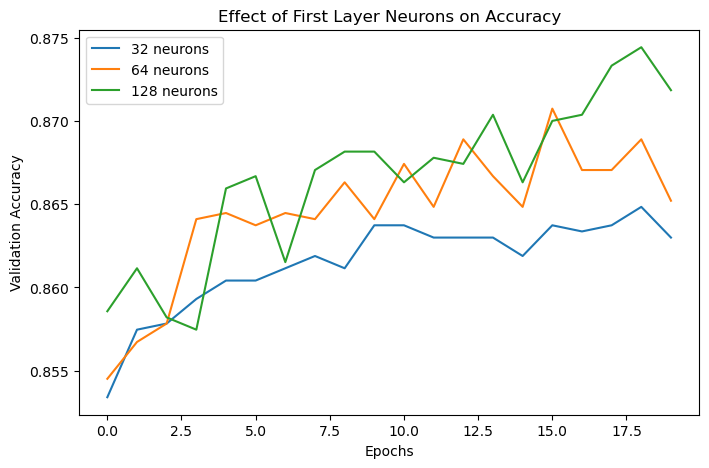

In [38]:
import matplotlib.pyplot as plt

neurons_options = [32, 64, 128]
results_neurons = {}

for neurons in neurons_options:
    print(f"Training model with first layer neurons = {neurons}")
    # Build model with custom neurons for the first layer and fixed second layer
    model = build_ann_model(neurons=[neurons, 32], dropout_rates=[0.3, 0.2], input_shape=X_train_pca.shape[1])
    history = model.fit(X_train_pca, y_train, epochs=20, batch_size=32, 
                        validation_data=(X_test_pca, y_test), verbose=0)
    loss, acc = model.evaluate(X_test_pca, y_test, verbose=0)
    results_neurons[neurons] = history.history
    print(f"Test accuracy with {neurons} neurons: {acc:.4f}\n")

# Optionally, plot the validation accuracy for each configuration
plt.figure(figsize=(8,5))
for neurons, history in results_neurons.items():
    plt.plot(history['val_accuracy'], label=f'{neurons} neurons')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Effect of First Layer Neurons on Accuracy')
plt.legend()
plt.show()


From these results, you can see that increasing the number of neurons in the first hidden layer (from 32 → 64 → 128) consistently improves the model’s test accuracy:

32 neurons: 0.8630

64 neurons: 0.8652

128 neurons: 0.8719

This suggests that a higher-capacity network (i.e., more neurons in the layer) can better capture the underlying patterns in the data—at least within this range. Of course, it’s still important to keep an eye on overfitting and training time, but in this specific experiment, 128 neurons yielded the best performance.

# Experiment 2 – Varying the Number of Layers

Training model with architecture: 1_layer
Test accuracy for 1_layer: 0.8663

Training model with architecture: 2_layers
Test accuracy for 2_layers: 0.8682

Training model with architecture: 3_layers
Test accuracy for 3_layers: 0.8704



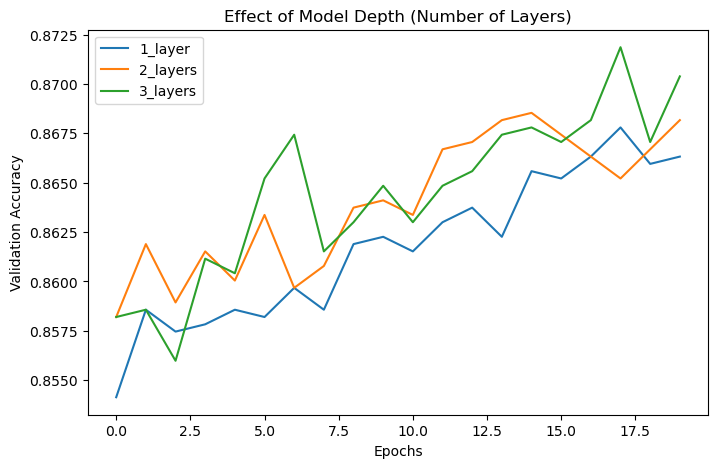

In [39]:
architectures = {
    '1_layer': [64],
    '2_layers': [64, 32],
    '3_layers': [128, 64, 32]
}

arch_results = {}

for arch_name, arch in architectures.items():
    print(f"Training model with architecture: {arch_name}")
    # Use a fixed dropout rate for each layer (you can adjust as needed)
    dropout_rates = [0.3] * len(arch)
    model = build_ann_model(neurons=arch, dropout_rates=dropout_rates, input_shape=X_train_pca.shape[1])
    history = model.fit(X_train_pca, y_train, epochs=20, batch_size=32, 
                        validation_data=(X_test_pca, y_test), verbose=0)
    loss, acc = model.evaluate(X_test_pca, y_test, verbose=0)
    arch_results[arch_name] = history.history
    print(f"Test accuracy for {arch_name}: {acc:.4f}\n")

# Plot validation accuracy for each architecture
plt.figure(figsize=(8,5))
for arch_name, history in arch_results.items():
    plt.plot(history['val_accuracy'], label=arch_name)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Model Depth (Number of Layers)')
plt.legend()
plt.show()


From this chart comparing 1-layer, 2-layer, and 3-layer architectures, we see that adding more layers (i.e., increasing model depth) generally improves validation accuracy. The 3-layer model (green line) achieves the highest accuracy overall, followed by the 2-layer model (orange line). The 1-layer model (blue line) lags behind the other two. This suggests that a deeper network is able to learn more complex representations from the data, leading to better performance—at least within this range of depths and with the given hyperparameters.

# Experiment 3 – Varying the Dropout Rate

Training model with dropout rate = 0.0
Test accuracy with dropout rate 0.0: 0.8700

Training model with dropout rate = 0.2
Test accuracy with dropout rate 0.2: 0.8693

Training model with dropout rate = 0.3
Test accuracy with dropout rate 0.3: 0.8685

Training model with dropout rate = 0.5
Test accuracy with dropout rate 0.5: 0.8634



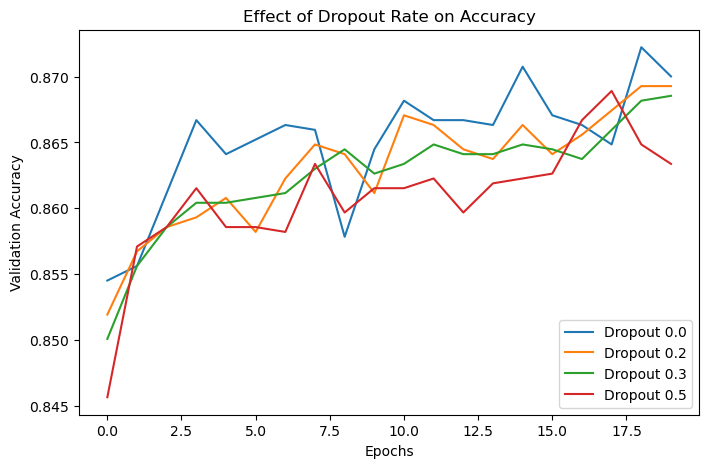

In [40]:
dropout_options = [0.0, 0.2, 0.3, 0.5]
dropout_results = {}

for rate in dropout_options:
    print(f"Training model with dropout rate = {rate}")
    model = build_ann_model(neurons=[64, 32], dropout_rates=[rate, rate], input_shape=X_train_pca.shape[1])
    history = model.fit(X_train_pca, y_train, epochs=20, batch_size=32, 
                        validation_data=(X_test_pca, y_test), verbose=0)
    loss, acc = model.evaluate(X_test_pca, y_test, verbose=0)
    dropout_results[rate] = history.history
    print(f"Test accuracy with dropout rate {rate}: {acc:.4f}\n")

# Plot validation accuracy for each dropout configuration
plt.figure(figsize=(8,5))
for rate, history in dropout_results.items():
    plt.plot(history['val_accuracy'], label=f'Dropout {rate}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Dropout Rate on Accuracy')
plt.legend()
plt.show()


From this chart, you can see that all four dropout settings (0.0, 0.2, 0.3, 0.5) ultimately reach fairly similar validation accuracies, with slight fluctuations throughout the epochs. A few key observations:

No Dropout (0.0) starts strong and reaches a high validation accuracy—often slightly above or on par with the others. However, zero dropout sometimes risks overfitting.

Moderate Dropout (0.2 or 0.3) also performs well, stabilizing at a similar or slightly lower accuracy compared to 0.0.

Higher Dropout (0.5) lags a bit in some epochs, but still ends close to the others.

Overall, while a small or moderate amount of dropout may help the model generalize, the differences here are not very large. If the goal is strictly highest accuracy, 0.0 or 0.2 might have a slight edge in this particular experiment, but it’s worth balancing that with the risk of overfitting when dropout is too low.

# Experiment 4 – Varying the Batch Size

Training model with batch size = 16
Test accuracy with batch size 16: 0.8641

Training model with batch size = 32
Test accuracy with batch size 32: 0.8656

Training model with batch size = 64
Test accuracy with batch size 64: 0.8674



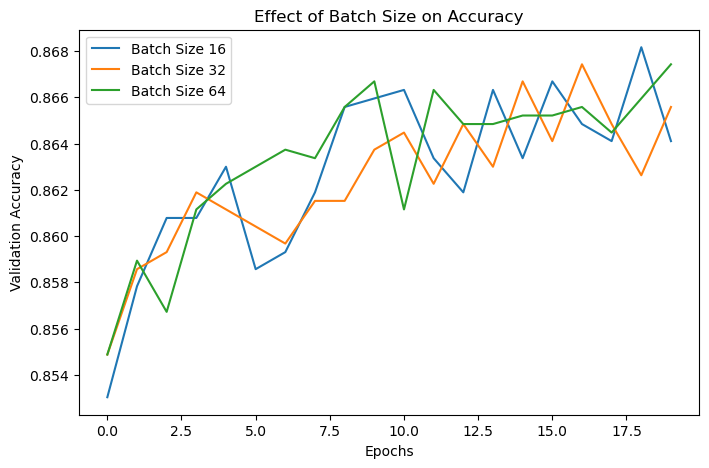

In [41]:
batch_sizes = [16, 32, 64]
batch_results = {}

for batch in batch_sizes:
    print(f"Training model with batch size = {batch}")
    model = build_ann_model(neurons=[64, 32], dropout_rates=[0.3, 0.2], input_shape=X_train_pca.shape[1])
    history = model.fit(X_train_pca, y_train, epochs=20, batch_size=batch, 
                        validation_data=(X_test_pca, y_test), verbose=0)
    loss, acc = model.evaluate(X_test_pca, y_test, verbose=0)
    batch_results[batch] = history.history
    print(f"Test accuracy with batch size {batch}: {acc:.4f}\n")

# Plot validation accuracy for different batch sizes
plt.figure(figsize=(8,5))
for batch, history in batch_results.items():
    plt.plot(history['val_accuracy'], label=f'Batch Size {batch}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Batch Size on Accuracy')
plt.legend()
plt.show()


From these results, increasing the batch size from 16 to 32 to 64 yields a slight but consistent improvement in test accuracy (0.8641 → 0.8656 → 0.8674). The differences are not huge, but it does suggest that, for this particular dataset and model configuration, a larger batch size provides a small boost in performance. Keep in mind that the “best” batch size can vary depending on the dataset, model architecture, and hardware constraints.